## Sklearn linear regression

In [107]:
import matplotlib.pyplot as plt
%matplotlib inline 
import numpy as np
from sklearn import datasets, linear_model

# Data
diabetes = datasets.load_diabetes()
print("Observations: ", len(diabetes.target))

# One Variable (first-one)
diabetes_X = diabetes.data[:, np.newaxis, 0]
print("Sample x variable:")
print(diabetes_X[:5])

diabetes_y = diabetes.target.reshape(-1, 1)
print("Sample y variable")
print(diabetes_y[:5])

# Linear Regression
linreg = linear_model.LinearRegression()

# Fit
linreg.fit(diabetes_X, diabetes_y)

# The coefficients
print("Beta Hat: \n", linreg.coef_)
print("Intercept: \n", linreg.intercept_)

Observations:  442
Sample x variable:
[[ 0.03807591]
 [-0.00188202]
 [ 0.08529891]
 [-0.08906294]
 [ 0.00538306]]
Sample y variable
[[ 151.]
 [  75.]
 [ 141.]
 [ 206.]
 [ 135.]]
Beta Hat: 
 [[ 304.18307453]]
Intercept: 
 [ 152.13348416]


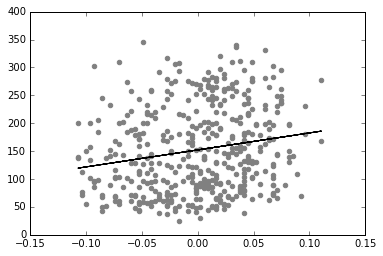

In [108]:
# Prediction
pred = linreg.predict(diabetes_X)

# Plot classification boundary
plt.scatter(diabetes_X, diabetes_y, color = 'grey')
plt.plot(diabetes_X, pred, color = 'black')
plt.show()

## OLS from Scratch

$$Y = X\beta + \varepsilon$$

$$\hat{\beta} = (X'X)^{-1}X'Y$$

In [109]:
class CustomLinearRegression(object):
    
    def __init__(self):
        pass
    
    def fit(self, X, Y):
        self.nrow = X.shape[0]
        if self.nrow != Y.shape[0]:
            raise Exception("Number of observations differs between X and y")
        # Add column of 1s for intercept coefficient
        self.X = np.concatenate((np.ones((self.nrow,1)), X), axis=1)
        self.beta_hat = np.dot(np.linalg.inv(np.dot(self.X.T,self.X)),
                               np.dot(self.X.T,Y))

    def predict(self, X):
        return np.dot(np.concatenate((np.ones((self.nrow,1)), X), axis=1), self.beta_hat)

Coefficients: 
 [[ 152.13348416]
 [ 304.18307453]]


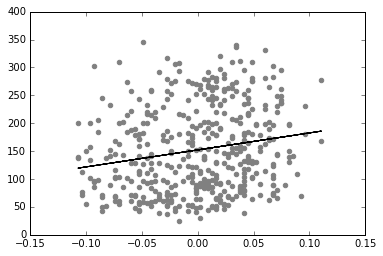

In [110]:
# Linear Regression
custlinreg = CustomLinearRegression()

# Fit
custlinreg.fit(diabetes_X, diabetes_y)

# The coefficients
print("Coefficients: \n", custlinreg.beta_hat)

# Prediction
pred = custlinreg.predict(diabetes_X)

# Plot classification boundary
plt.scatter(diabetes_X, diabetes_y, color = 'grey')
plt.plot(diabetes_X, pred, color = 'black')
plt.show()

## Gradient Descent from Scratch

In [111]:
class CustomSGD(object):
    
    def __init__(self):
        pass
    
    def fit(self, X, Y, lr, epochs):
        self.nrow = X.shape[0]
        if self.nrow != Y.shape[0]:
            raise Exception("Number of observations differs between X and y")
        # Add column of 1s for intercept coefficient
        self.X = np.concatenate((np.ones((self.nrow,1)), X), axis=1)
        self.theta = np.ones((self.X.shape[-1], 1))
        
        for epoch in range(epochs):
            residual = np.dot(self.X, self.theta) - Y
            #cost = np.sum(residual**2) / (2*self.nrow)
            #print("Epoch %d | Cost: %f" % (epoch, cost))
            grad = np.dot(self.X.T, residual) / self.nrow
            # Backwards
            self.theta = self.theta - (lr*grad)

    def predict(self, X):
        return np.dot(np.concatenate((np.ones((self.nrow,1)), X), axis=1), self.theta)           

Coefficients: 
 [[ 152.13348416]
 [ 304.18307453]]


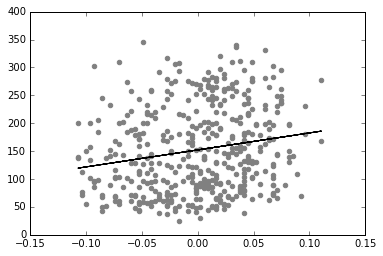

In [112]:
# Linear Regression
custlinregsgd = CustomSGD()

# Fit
custlinregsgd.fit(diabetes_X, diabetes_y, lr=0.5, epochs=100000)

# The coefficients
print("Coefficients: \n", custlinregsgd.theta)

# Prediction
pred = custlinregsgd.predict(diabetes_X)

# Plot classification boundary
plt.scatter(diabetes_X, diabetes_y, color = 'grey')
plt.plot(diabetes_X, pred, color = 'black')
plt.show()